In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

In [2]:
df_eval = pd.read_csv('../data/Evaluation_Set/RFMiD_Validation_Labels.csv')

In [3]:
df_train = pd.read_csv('../data/Training_Set/RFMiD_Training_Labels.csv')

In [4]:
df_train.head()

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Creating a different df to store disease risk column for the data

In [5]:
df_disease_risk_train = df_train['Disease_Risk']
df_disease_risk_eval = df_eval['Disease_Risk']

In [6]:
df_train.drop(['Disease_Risk'], axis=1, inplace=True)
df_eval.drop(['Disease_Risk'], axis=1, inplace=True)

In [7]:
df_train.head()

,ID,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_eval.head()

,ID,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
## making ID column as index
df_train.set_index('ID', inplace=True)
df_eval.set_index('ID', inplace=True)

In [10]:
df_train = df_train[['DR', 'MH', 'TSLN', 'ODC']]
df_eval = df_eval[['DR', 'MH', 'TSLN', 'ODC']]

print("shape of train data: ", df_train.shape)
print("shape of eval data: ", df_eval.shape)

shape of train data:  (1920, 4)
shape of eval data:  (640, 4)


In [11]:
## removing the rows which have no diseases
df_train = df_train[df_train.sum(axis=1) != 0]
df_eval = df_eval[df_eval.sum(axis=1) != 0]

In [12]:
print("shape of train data: ", df_train.shape)
print("shape of eval data: ", df_eval.shape)

shape of train data:  (949, 4)
shape of eval data:  (295, 4)


In [13]:
df_train.head()

,DR,MH,TSLN,ODC
ID,,,,
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,1
5,1,0,0,0


In [14]:
df_eval.head()

,DR,MH,TSLN,ODC
ID,,,,
1,1,0,1,0
11,1,0,0,0
12,1,0,0,0
20,1,0,0,0
23,0,0,1,0


In [15]:
## adding the disease risk column to the train and eval data with ID as index
df_train['Disease_Risk'] = df_disease_risk_train
df_eval['Disease_Risk'] = df_disease_risk_eval

In [16]:
df_train.head()

,DR,MH,TSLN,ODC,Disease_Risk
ID,,,,,
1,1,0,0,0,1
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,1,1
5,1,0,0,0,1


In [17]:
df_eval['Disease_Risk'].value_counts()

1    261
0     34
Name: Disease_Risk, dtype: int64

In [18]:
## saving the train and eval data
df_train.to_csv('../data/Training_Set/train_labels.csv')
df_eval.to_csv('../data/Evaluation_Set/eval_labels.csv')

Im encode the image data,
Subsampling the data. 

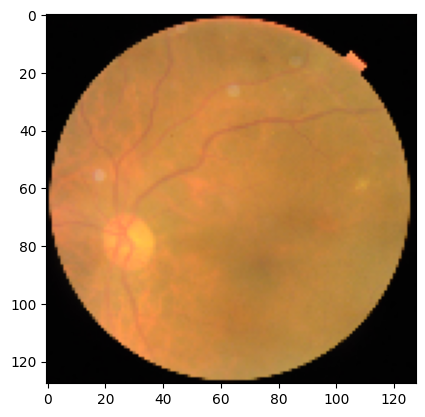

In [61]:
## opening an image and converting it to numpy array
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('../data/Training_Set/Training/103.png')
img1 = img
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
## cropping the sides of the image
img = img[5:img.shape[0]-5, 360:img.shape[1]-360]
## normalizing the image
img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
## pyrdown the image
img = cv2.pyrDown(img)
## resizing the image to 224x224x3
img = cv2.resize(img, (128, 128))
##converting it into 1d array
## converting the image to grayscale
# img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img)
plt.show()

In [62]:
img

array([[[0.01500056, 0.00918457, 0.01209257],
        [0.01411485, 0.0094181 , 0.01176647],
        [0.01164365, 0.01164365, 0.01164365],
        ...,
        [0.01032985, 0.01032985, 0.01032985],
        [0.01208159, 0.01208159, 0.01208159],
        [0.01106649, 0.01106649, 0.01106649]],

       [[0.00964226, 0.00964226, 0.00964226],
        [0.01048786, 0.01048786, 0.01048786],
        [0.01010103, 0.01010103, 0.01010103],
        ...,
        [0.00784314, 0.00784314, 0.00784314],
        [0.01484575, 0.00799807, 0.01142191],
        [0.00786931, 0.00786931, 0.00786931]],

       [[0.00798217, 0.00798217, 0.00798217],
        [0.00809129, 0.00809129, 0.00809129],
        [0.01204966, 0.01204966, 0.01204966],
        ...,
        [0.01440325, 0.00753662, 0.01096994],
        [0.01597292, 0.0089362 , 0.01245456],
        [0.00777298, 0.00777298, 0.00777298]],

       ...,

       [[0.00788718, 0.00788718, 0.00788718],
        [0.00784314, 0.00784314, 0.00784314],
        [0.00784314, 0

In [63]:
## size of the image in mb after preprocessing
import sys
print(sys.getsizeof(img)/1000000)

0.196752


In [65]:
import os
import cv2
import numpy as np

def preprocess_image(file_path):
    img = cv2.imread(file_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ## cropping the sides of the image
    img = img[5:img.shape[0]-5, 360:img.shape[1]-360]
    ## normalizing the image
    img = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    ## pyrdown the image
    img = cv2.pyrDown(img)
    ## resizing the image to 224x224x3
    img = cv2.resize(img, (224, 224))
    ## converting the image to grayscale
    # img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img

In [90]:
## preprocessing the train images
output_path = '../data/Training_Set/preprocessed_numpy'
input_path = '../data/Training_Set/Training'

for file in os.listdir(input_path):
    if file.endswith('.png'):
        img = preprocess_image(os.path.join(input_path, file))
        np.save(os.path.join(output_path, file.split('.')[0]), img)

In [66]:
## preprocessing the valdaition images
output_path = '../data/Evaluation_Set/preprocessed_eval'
input_path = '../data/Evaluation_Set/Validation'

for file in os.listdir(input_path):
    if file.endswith('.png'):
        img = preprocess_image(os.path.join(input_path, file))
        np.save(os.path.join(output_path, file.split('.')[0]), img)

In [111]:
file_loc = '../data/Training_Set/preprocessed_numpy/'

array = []
for i in df_train.index:
    array.append(str(i)+'.npy')

## only keeping the images in the folder which are in the index of df_train
for file in os.listdir(file_loc):
    if file not in array:
        os.remove(file_loc+file)

In [112]:
## checking if the number of images in the folder is same as the number of rows in the dataframe
print(len(os.listdir(file_loc)))

949


In [113]:
df_train.shape

(949, 5)

In [115]:
file_loc = '../data/Evaluation_Set/preprocessed_eval/'

array = []
for i in df_eval.index:
    array.append(str(i)+'.npy')

## only keeping the images in the folder which are in the index of df_train
for file in os.listdir(file_loc):
    if file not in array:
        os.remove(file_loc+file)

In [116]:
print(len(os.listdir(file_loc)))

295


In [117]:
df_eval.shape

(295, 5)